fixing the transform function (based on ellipse 7 on page 134). 

Reminder: LOCAL means the ellipsoid and points when it is assumed that the center of the ellipse is the origin (0,0,0). GLOBAL is the ellipsoid and points where the origin is when it is being plotted.


In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunCleaner import *
from random import uniform
import random

#given a point (or vector) and a set of angles corresponding to (x,y,z), rotates about the origin
#returns the rotated point (or vector)
def rotate(point,thetaxyz):
    x = point[0]
    y = point[1]
    z = point[2]
    v = [x,y,z]
    lenvect = (x**2 + y**2 + z**2)**.5
    V = N(v)
    V2 = np.array(np.dot(V,Rxyz(thetaxyz)))
    v2f = V2[0]*lenvect
    return v2f

#for going in opposite direction, so z,y,x
def rotaterev(point,thetaxyz):
    x = point[0]
    y = point[1]
    z = point[2]
    v = [x,y,z]
    lenvect = (x**2 + y**2 + z**2)**.5
    V = N(v)
    VZ = np.array(np.dot(V,Rz(thetaxyz[2])))
    VZY = np.array(np.dot(VZ,Ry(thetaxyz[1])))
    VZYX = np.array(np.dot(VZY,Rx(thetaxyz[0])))
    v2f = VZYX[0]*lenvect
    return v2f

#given a point (or vector) and an origin (a local one in global coordinates), shifts to the Local origin in Global coordinates 
def shift(point, origin):
    x = point[0]
    y = point[1]
    z = point[2]
    x2 = x + origin[0]
    y2 = y + origin[1]
    z2 = z + origin[2]
    v2 = [x2,y2,z2]
    return v2

#transforms point(s) from local coordinate system to corresponding glocal coordinate system
#origin is the LOCAL origin in GLOBAL coordinates
def transformLG(x,y,z,origin, thetaxyz):
    XTR = []
    YTR = []
    ZTR = []
    if type(x) is int or type(x) is float or type(x) is numpy.float64:
        v = [x,y,z]
        if x ==0 and y ==0 and z == 0:
            vf = shift(v,origin)
            XTR=vf[0]
            YTR=vf[1]
            ZTR=vf[2]
        else:
            v2R = rotate(v,thetaxyz)
            v2RS = shift(v2R,origin)
            XTR = v2RS[0]
            YTR = v2RS[1]
            ZTR = v2RS[2]
    else:
        for i in range (0, len(x)):
            v = [x[i],y[i],z[i]]
            if x[i] == 0 and y[i] ==0 and z[i] == 0:
                vf = shift(v,origin)
                XTR.append(vf[0])
                YTR.append(vf[1])
                ZTR.append(vf[2])
            else:
                v2R = rotate(v,thetaxyz)
                v2RS = shift(v2R,origin)
                XTR.append(v2RS[0])
                YTR.append(v2RS[1])
                ZTR.append(v2RS[2])    
    return XTR,YTR,ZTR

#transforms point(s) from global coordinate system to given local coordinate system
#origin is the LOCAL origin in GLOBAL coordinates
def transformGL(x,y,z,origin, thetaxyz):
    XTR = []
    YTR = []
    ZTR = []
    if type(x) is int or type(x) is float or type(x) is numpy.float64:
        v = [x,y,z]
        if x ==0 and y ==0 and z == 0:
            vf = shift(v,negvect(origin))
            XTR=vf[0]
            YTR=vf[1]
            ZTR=vf[2]
        else:
            v2S = shift(v,negvect(origin))
            v2RS = rotaterev(v2S,negvect(thetaxyz))
            XTR = v2RS[0]
            YTR = v2RS[1]
            ZTR = v2RS[2]
    else:
        for i in range (0, len(x)):
            v = [x[i],y[i],z[i]]
            if x[i] == 0 and y[i] ==0 and z[i] == 0:
                vf = shift(v,negvect(origin))
                XTR.append(vf[0])
                YTR.append(vf[1])
                ZTR.append(vf[2])
            else:
                v2S = shift(v,negvect(origin))
                v2RS = rotaterev(v2S,negvect(thetaxyz))
                XTR.append(v2RS[0])
                YTR.append(v2RS[1])
                ZTR.append(v2RS[2])    
    return XTR,YTR,ZTR

In [2]:
#changing. see pg 134 - 136
originG = [0,0,0]
origin7 = [160.375,-7.5,40] # (ellipse7)
coeffellipse7 = [164.695,99.88,130.95] #for ellipse 7
thet7 = [0,.3104,-1.31067] #rotated around z axis and x axis
#ellipse 7 
X71,Y71,Z71,X81,Y81,Z81 = FTSEC(50,np.pi*.99, coeffellipse7, 325, 'pos')
X7n,Y7n,Z7n,X8n,Y8n,Z8n = FTSEC(50,np.pi*.99, coeffellipse7, 325, 'neg')

Xset7,Yset7,Zset7 = transformLG(X71,Y71,Z71,origin7,thet7)
Xset8,Yset8,Zset8 = transformLG(X81,Y81,Z81,origin7,thet7)

X7,Y7,Z7 = SR7(32.07,Xset7, Yset7, Zset7, origin7)
X8,Y8,Z8 = SR7(32.07,Xset8, Yset8, Zset8, origin7)

In [3]:
#trying L-G origin (local origin to global origin)
cL = [0,0,0]
cG = transformLG(0,0,0,origin7,thet7)
cG 
#OKAY IT ONLY WORKS IN ONE CASE BUT TAHT MEANS THE ORDER HAS TO BE FIXED#
#works for origin from global to local

(160.375, -7.5, 40)

In [4]:
#trying L-G
f1L = [130.95,0,0]
fiG = transformLG(-130.95,0,0,origin7,thet7)
fiG
#YES THIS WORKED! (see pg 136)

(128.30386589156288, -127.99713760729563, 0.002691522464914442)

In [5]:
f1G = [128.3,-128,0]
f1L = transformGL(128.3,-128,0,origin7,thet7)
f1L
#YAY THIS IS RIGHT TOO (see pg 136)

(-130.95440280495342, 0.0029996183498597869, -0.0014143199943266859)

In [8]:
#rewriting retransform
def RT(sourcepoints,v1,sourcethet1, ellipseorigin1, sourcethet2, ellipseorigin2):
    vx,vy,vz = sep(v1)
    spx,spy,spz = sep(sourcepoints)
    #LOCAL to GLOBAL
    vGx,vGy,vGz = transformLG(vx,vy,vz,ellipseorigin1,sourcethet1)
    spGx,spGy,spGz = transformLG(spx,spy,spz,ellipseorigin1,sourcethet1)
    #GLOBAL back to SECOND LOCAL
    vfx,vfy,vfz = transformGL(vGx,vGy,vGz,ellipseorigin2,sourcethet2)
    spfx,spfy,spfz = transformGL(spGx,spGy,spGz,ellipseorigin2,sourcethet2)
    sp = [spfx,spfy,spfz]
    v2 = [vfx,vfy,vfz]
    return sp, v2

In [15]:
X,Y = RT(f1G,f1G,thet7,origin7,thet7,origin7)
#YAY THIS WORKS
X

[128.30000000000004, -128.00000000000006, -2.8906704815989157e-15]

In [10]:
def FS(specnum,sourcepoint,sourcethet,origin):
    originG = [0,0,0]
    if type(sourcepoint[0]) is int or type(sourcepoint[0]) is float or type(sourcepoint[0]) is numpy.float64:
        v1 = spec(specnum)
        vx,vy,vz = sep(v1)
        v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
        p1x,p1y,p1z = shift(sourcepoint,origin)
        sp = [p1x,p1y,p1z]
        v2 = sepop(v1x,v1y,v1z)
    else: 
        v1 = spec(specnum)
        vx,vy,vz = sep(v1)
        v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
        v2 = sepop(v1x,v1y,v1z)
        sp = []
        for i in range (0,specnum):
            spx = random.choice(sourcepoint[0])
            spy = random.choice(sourcepoint[1])
            spz = random.choice(sourcepoint[2])
            sp1x,sp1y,sp1z = transformLG(spx,spy,spz,origin,sourcethet)
            spT = [sp1x,sp1y,sp1z]
            sp.append(spT)
    return sp,v2

In [11]:
#attempting to use the new FS
x,y,z=circularsource(8)
sourcepoint = [x,y,z]
sourcethet = [np.pi/2,0,0]
sp1, v1 = FS(100,sourcepoint,sourcethet ,origin7)

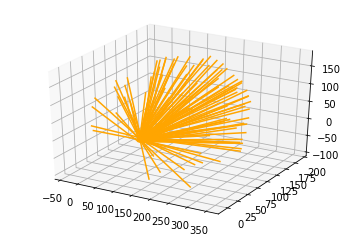

In [12]:
pl3dsurf = pl.figure().gca(projection = '3d')
for i in range (0,len(v1)):
    x,y,z = ML(sp1[i], v1[i], 200)
    pl3dsurf.plot(x,y,z, color = 'orange')
pl.show()